In [1]:
step=91
extent="intra" #"intra") #inter or intra # irrelevant for MovingWindow
Dataset='Jake'
var_names = ["Rg","T","NEE","VPD","H","LE"]
nv=len(var_names)
tau_min=0
tau_max=5
min_len=5
attribute2='_RgNotDriver'


In [2]:
alpha_level=0.1

In [3]:
import numpy as np
import matplotlib
import os
import pandas as pd
#matplotlib.use('PDF')
from matplotlib import pyplot as plt
from tigramite import plotting as tp
from tigramite.data_processing import DataFrame
import xarray as xr


import scipy
import sklearn
from sklearn.cluster import KMeans, MeanShift, DBSCAN
from sklearn.preprocessing import scale

import numpy.ma as ma
from netCDF4 import Dataset as NetCDFFile
import os


#import geopandas as gpd
#import geoplot as gplt

from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.metrics import pairwise_distances

import seaborn as sns

In [4]:
from sklearn import linear_model

from scipy.spatial import ConvexHull

In [5]:
cont_links_agg=[]
lag_links_agg=[]
matrix=np.zeros((nv,nv,tau_max-tau_min+1),'U8')
for i,d in enumerate(var_names):
    for j,r in enumerate(var_names):
        #for t in [0,1,2,3,4,5]:
        #labels.append(d + "→" +r+':1-6')
        cont_links_agg.append(d + "→" +r+':0')
        lag_links_agg.append(d + "→" +r+':1-%s'%(tau_max))
           # matrix[i,j,t]=d + "→" +r+str(t)

lag_links_agg_red=[]
for i,link in enumerate(lag_links_agg):
 #   if not link[:link.index('→')] in link[link.index('→'):]:
        if not 'Rg' in link[link.index('→'):]:
            lag_links_agg_red.append(link)

lag_links_agg_red_noAC=[]
for i,link in enumerate(lag_links_agg):
    if not link[:link.index('→')] in link[link.index('→'):]:
        if not 'Rg' in link[link.index('→'):]:
            lag_links_agg_red.append(link)

cont_links_agg_red=[]
for i,link in enumerate(cont_links_agg):
    if not link[:link.index('→')] in link[link.index('→'):]:
        if not 'Rg' in link[link.index('→'):]:
            if  link[link.index('→')+1:link.index(':')] + '→' + link[:link.index('→')] +':0' not in cont_links_agg_red:
                cont_links_agg_red.append(link)
                
cont_links_agg_red_NEE=[]
cont_links_agg_red_NEE=[link for link in cont_links_agg_red if 'NEE' in link]

cont_links_agg_red_noNEE=[]
cont_links_agg_red_noNEE=[link for link in cont_links_agg_red if 'NEE' not in link]

cont_links_agg_red_NEELE=[]
cont_links_agg_red_NEELE=[link for link in cont_links_agg_red if 'NEE' in link or 'LE' in link ]

cont_links_agg_red_noNEELE=[]
cont_links_agg_red_noNEELE=[link for link in cont_links_agg_red if 'NEE' not in link and 'LE' not in link]

In [18]:
cont_links_agg_red

['Rg→T:0',
 'Rg→NEE:0',
 'Rg→VPD:0',
 'Rg→H:0',
 'Rg→LE:0',
 'T→NEE:0',
 'T→VPD:0',
 'T→H:0',
 'T→LE:0',
 'NEE→VPD:0',
 'NEE→H:0',
 'NEE→LE:0',
 'VPD→H:0',
 'VPD→LE:0',
 'H→LE:0']

In [27]:
data=pd.read_csv("../Data/df_val_q_t_y_m_%s_%s_%s_%s_%s_%s%s_Tier1_Clustering80,8,0.1.csv" % (Dataset,extent,step,tau_max,min_len,alpha_level,attribute2),index_col=0)
#data.columns.values[49:265]=data.columns.values[49:265].astype(int)


/home/christopher/anaconda3/envs/tigraClustOldPandas/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (266,268,269,346,347,352) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
data#.keys().values

,Rg_mean_y,T_mean_y,NEE_mean_y,VPD_mean_y,H_mean_y,LE_mean_y,P_mean_y,GPP_mean_y,Tower,lon,...,Month_GPPmax,PeakGrowingMonth,PeakGrowingMonth_Year,KoeppenGeigerType,KoeppenGeigerGroup,KoeppenGeigerSpec,StandAge,TSNE_cont_links_agg_red_301,TSNE_cont_links_agg_red_302,Clustering_TSNE_cont_links_agg_red_30
0,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,Jun,False,False,26.0,4.0,Dfb,NaN,-88.785416,-27.356580,0
1,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,Jun,False,False,26.0,4.0,Dfb,NaN,-12.563959,57.876130,-1
2,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,Jun,False,False,26.0,4.0,Dfb,NaN,-21.289097,52.827150,1
3,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,Jun,False,False,26.0,4.0,Dfb,NaN,-12.139230,45.353294,1
4,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,Jun,True,True,26.0,4.0,Dfb,NaN,-22.306807,37.534900,1
5,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,Jun,False,False,26.0,4.0,Dfb,NaN,-21.928116,37.257065,1
6,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,Jun,False,False,26.0,4.0,Dfb,NaN,-22.271450,38.296444,1
7,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,Jun,False,False,26.0,4.0,Dfb,NaN,-33.292427,46.094610,1
8,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,Jun,False,False,26.0,4.0,Dfb,NaN,-46.697308,37.290947,-1
9,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,Jun,False,False,26.0,4.0,Dfb,NaN,-94.557850,-18.390446,0


In [45]:
#data.drop([ 'Clustering_TSNE_cont_links_agg_red_50','MedianTSNE50Space_TowerSeason'], axis=1, inplace=True)

In [28]:
data#.loc[:10037]

,Rg_mean_y,T_mean_y,NEE_mean_y,VPD_mean_y,H_mean_y,LE_mean_y,P_mean_y,GPP_mean_y,Tower,lon,...,PeakGrowingMonth_Year,KoeppenGeigerType,KoeppenGeigerGroup,KoeppenGeigerSpec,StandAge,TSNE_cont_links_agg_red_301,TSNE_cont_links_agg_red_302,Clustering_TSNE_cont_links_agg_red_30,Median_TSNE_cont_links_agg_red_30_Space_TowerSeason_,Median_TSNE_cont_links_agg_red_30_Space_TowerSeason
0,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,0.0,26.0,4.0,Dfb,NaN,-88.785416,-27.356580,0,0.0,NaN
1,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,0.0,26.0,4.0,Dfb,NaN,-12.563959,57.876130,-1,0.0,NaN
2,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,0.0,26.0,4.0,Dfb,NaN,-21.289097,52.827150,1,0.0,NaN
3,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,0.0,26.0,4.0,Dfb,NaN,-12.139230,45.353294,1,0.0,NaN
4,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,1.0,26.0,4.0,Dfb,NaN,-22.306807,37.534900,1,0.0,NaN
5,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,0.0,26.0,4.0,Dfb,NaN,-21.928116,37.257065,1,0.0,NaN
6,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,0.0,26.0,4.0,Dfb,NaN,-22.271450,38.296444,1,0.0,NaN
7,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,0.0,26.0,4.0,Dfb,NaN,-33.292427,46.094610,1,0.0,NaN
8,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,0.0,26.0,4.0,Dfb,NaN,-46.697308,37.290947,-1,0.0,NaN
9,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,0.0,26.0,4.0,Dfb,NaN,-94.557850,-18.390446,0,0.0,NaN


In [29]:
data=data.loc[:10037]

In [25]:
data=data[data["Median_%s_Space_TowerSeason" % dimRedType]==False]

In [30]:
data

,Rg_mean_y,T_mean_y,NEE_mean_y,VPD_mean_y,H_mean_y,LE_mean_y,P_mean_y,GPP_mean_y,Tower,lon,...,PeakGrowingMonth_Year,KoeppenGeigerType,KoeppenGeigerGroup,KoeppenGeigerSpec,StandAge,TSNE_cont_links_agg_red_301,TSNE_cont_links_agg_red_302,Clustering_TSNE_cont_links_agg_red_30,Median_TSNE_cont_links_agg_red_30_Space_TowerSeason_,Median_TSNE_cont_links_agg_red_30_Space_TowerSeason
0,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,0.0,26.0,4.0,Dfb,NaN,-88.785416,-27.356580,0,0.0,NaN
1,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,0.0,26.0,4.0,Dfb,NaN,-12.563959,57.876130,-1,0.0,NaN
2,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,0.0,26.0,4.0,Dfb,NaN,-21.289097,52.827150,1,0.0,NaN
3,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,0.0,26.0,4.0,Dfb,NaN,-12.139230,45.353294,1,0.0,NaN
4,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,1.0,26.0,4.0,Dfb,NaN,-22.306807,37.534900,1,0.0,NaN
5,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,0.0,26.0,4.0,Dfb,NaN,-21.928116,37.257065,1,0.0,NaN
6,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,0.0,26.0,4.0,Dfb,NaN,-22.271450,38.296444,1,0.0,NaN
7,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,0.0,26.0,4.0,Dfb,NaN,-33.292427,46.094610,1,0.0,NaN
8,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,0.0,26.0,4.0,Dfb,NaN,-46.697308,37.290947,-1,0.0,NaN
9,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,0.0,26.0,4.0,Dfb,NaN,-94.557850,-18.390446,0,0.0,NaN


In [31]:
j=30
dimRedType='TSNE_cont_links_agg_red_%s'% j

In [32]:
data["Median_%s_Space_TowerSeason" % dimRedType]=False
for tower in data.Tower.unique():
    for season in data.loc[(data.Tower==tower)].Season.unique():
        #print(tower,season)
        temp=data.loc[(data.Tower==tower) & (data.Season==season)]
        
        indices=temp.index
        while len(temp)>3:
           # print(len(temp))
            hull=ConvexHull(temp[[dimRedType+'1',dimRedType+'2']])
            indices=temp.index
            temp=temp[[dimRedType+'1',dimRedType+'2']].drop(indices[hull.vertices])

        temp_mean=data.loc[indices].mean()

        temp_mean['Tower']=tower
        temp_mean['Season']=season
        temp_mean["Median_%s_Space_TowerSeason" % dimRedType]=True
        temp_mean['Clustering_%s'%dimRedType]=-1
        data=data.append(temp_mean, ignore_index=True)

/home/christopher/anaconda3/envs/tigraClustOldPandas/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
data.to_csv("../Data/df_val_q_t_y_m_%s_%s_%s_%s_%s_%s%s_Tier1_Clustering80,8,0.1.csv" % (Dataset,extent,step,tau_max,min_len,alpha_level,attribute2))

In [17]:
temp_mean

Rg_mean_y                                                              101.492
T_mean_y                                                               21.9009
NEE_mean_y                                                            0.503706
VPD_mean_y                                                             13.6395
H_mean_y                                                               47.2211
LE_mean_y                                                              48.2451
P_mean_y                                                               1.82855
GPP_mean_y                                                             3.79512
lon                                                                    23.2528
lat                                                                   -15.4378
Rg_mean_s                                                              100.875
T_mean_s                                                               22.2976
NEE_mean_s                                          

In [18]:
data[["Median_%s_Space_TowerSeason" % dimRedType,'Clustering_%s'%dimRedType]]

,Median_TSNE_cont_links_agg_red_30_Space_TowerSeason,Clustering_TSNE_cont_links_agg_red_30
0,NaN,0
1,NaN,-1
2,NaN,1
3,NaN,1
4,NaN,1
5,NaN,1
6,NaN,1
7,NaN,1
8,NaN,-1
9,NaN,0


In [1]:
data

NameError: name 'data' is not defined

## Centroid calculation, not used

In [9]:
from scipy.spatial import distance_matrix

In [28]:
data['CentroidTSNE50Space_TowerSeason']=False

In [29]:
temp=data.groupby(['Tower','Season'])#[dimRedType+dimReddim1,dimRedType+dimReddim2].apply(pd.index())

for key in temp.groups.keys():    
        print(key)
 #   if key[0]=='DE-Lnf.DD.2002.2012.nc':
        temp_xy=temp.get_group(key)[[dimRedType+'1',dimRedType+'2']]   #[cont_links_agg_red]
        centroid=distance_matrix(temp_xy,temp_xy).sum(axis=1).argmin()
        data.loc[temp.indices[key][centroid],'CentroidTSNE50Space_TowerSeason']=True
  #      f,ax=plt.subplots(figsize=(6,6))
   #     temp_xy.plot.scatter(x='tSNE_cont_links_agg_red_501',y='tSNE_cont_links_agg_red_502',ax=ax)
    #    temp_xy.iloc[centroid:centroid+1].plot.scatter(x='tSNE_cont_links_agg_red_501',y='tSNE_cont_links_agg_red_502',c='r',ax=ax)

('AT-Neu.DD.2002.2012.nc', 'Apr')
('AT-Neu.DD.2002.2012.nc', 'Aug')
('AT-Neu.DD.2002.2012.nc', 'Dec')
('AT-Neu.DD.2002.2012.nc', 'Feb')
('AT-Neu.DD.2002.2012.nc', 'Jan')
('AT-Neu.DD.2002.2012.nc', 'Jul')
('AT-Neu.DD.2002.2012.nc', 'Jun')
('AT-Neu.DD.2002.2012.nc', 'Maj')
('AT-Neu.DD.2002.2012.nc', 'Mar')
('AT-Neu.DD.2002.2012.nc', 'Nov')
('AT-Neu.DD.2002.2012.nc', 'Oct')
('AT-Neu.DD.2002.2012.nc', 'Sep')
('AU-ASM.DD.2010.2014.nc', 'Apr')
('AU-ASM.DD.2010.2014.nc', 'Aug')
('AU-ASM.DD.2010.2014.nc', 'Dec')
('AU-ASM.DD.2010.2014.nc', 'Feb')
('AU-ASM.DD.2010.2014.nc', 'Jan')
('AU-ASM.DD.2010.2014.nc', 'Jul')
('AU-ASM.DD.2010.2014.nc', 'Jun')
('AU-ASM.DD.2010.2014.nc', 'Maj')
('AU-ASM.DD.2010.2014.nc', 'Mar')
('AU-ASM.DD.2010.2014.nc', 'Nov')
('AU-ASM.DD.2010.2014.nc', 'Oct')
('AU-ASM.DD.2010.2014.nc', 'Sep')
('AU-Cpr.DD.2010.2014.nc', 'Apr')
('AU-Cpr.DD.2010.2014.nc', 'Aug')
('AU-Cpr.DD.2010.2014.nc', 'Dec')
('AU-Cpr.DD.2010.2014.nc', 'Feb')
('AU-Cpr.DD.2010.2014.nc', 'Jan')
('AU-Cpr.DD.20

('CH-Oe2.DD.2004.2014.nc', 'Sep')
('CZ-BK1.DD.2004.2014.nc', 'Aug')
('CZ-BK1.DD.2004.2014.nc', 'Dec')
('CZ-BK1.DD.2004.2014.nc', 'Jul')
('CZ-BK1.DD.2004.2014.nc', 'Jun')
('CZ-BK1.DD.2004.2014.nc', 'Nov')
('CZ-BK1.DD.2004.2014.nc', 'Oct')
('CZ-BK1.DD.2004.2014.nc', 'Sep')
('CZ-BK2.DD.2004.2012.nc', 'Aug')
('CZ-BK2.DD.2004.2012.nc', 'Jul')
('CZ-BK2.DD.2004.2012.nc', 'Jun')
('CZ-BK2.DD.2004.2012.nc', 'Sep')
('CZ-wet.DD.2006.2014.nc', 'Apr')
('CZ-wet.DD.2006.2014.nc', 'Aug')
('CZ-wet.DD.2006.2014.nc', 'Dec')
('CZ-wet.DD.2006.2014.nc', 'Feb')
('CZ-wet.DD.2006.2014.nc', 'Jan')
('CZ-wet.DD.2006.2014.nc', 'Jul')
('CZ-wet.DD.2006.2014.nc', 'Jun')
('CZ-wet.DD.2006.2014.nc', 'Maj')
('CZ-wet.DD.2006.2014.nc', 'Mar')
('CZ-wet.DD.2006.2014.nc', 'Nov')
('CZ-wet.DD.2006.2014.nc', 'Oct')
('CZ-wet.DD.2006.2014.nc', 'Sep')
('DE-Akm.DD.2009.2014.nc', 'Apr')
('DE-Akm.DD.2009.2014.nc', 'Aug')
('DE-Akm.DD.2009.2014.nc', 'Dec')
('DE-Akm.DD.2009.2014.nc', 'Feb')
('DE-Akm.DD.2009.2014.nc', 'Jan')
('DE-Akm.DD.20

('IT-Amp.DD.2002.2006.nc', 'Jan')
('IT-Amp.DD.2002.2006.nc', 'Jul')
('IT-Amp.DD.2002.2006.nc', 'Jun')
('IT-Amp.DD.2002.2006.nc', 'Maj')
('IT-Amp.DD.2002.2006.nc', 'Mar')
('IT-Amp.DD.2002.2006.nc', 'Nov')
('IT-Amp.DD.2002.2006.nc', 'Oct')
('IT-Amp.DD.2002.2006.nc', 'Sep')
('IT-BCi.DD.2004.2014.nc', 'Apr')
('IT-BCi.DD.2004.2014.nc', 'Aug')
('IT-BCi.DD.2004.2014.nc', 'Dec')
('IT-BCi.DD.2004.2014.nc', 'Feb')
('IT-BCi.DD.2004.2014.nc', 'Jan')
('IT-BCi.DD.2004.2014.nc', 'Jul')
('IT-BCi.DD.2004.2014.nc', 'Jun')
('IT-BCi.DD.2004.2014.nc', 'Maj')
('IT-BCi.DD.2004.2014.nc', 'Mar')
('IT-BCi.DD.2004.2014.nc', 'Nov')
('IT-BCi.DD.2004.2014.nc', 'Oct')
('IT-BCi.DD.2004.2014.nc', 'Sep')
('IT-Col.DD.1996.2014.nc', 'Apr')
('IT-Col.DD.1996.2014.nc', 'Aug')
('IT-Col.DD.1996.2014.nc', 'Dec')
('IT-Col.DD.1996.2014.nc', 'Feb')
('IT-Col.DD.1996.2014.nc', 'Jan')
('IT-Col.DD.1996.2014.nc', 'Jul')
('IT-Col.DD.1996.2014.nc', 'Jun')
('IT-Col.DD.1996.2014.nc', 'Maj')
('IT-Col.DD.1996.2014.nc', 'Mar')
('IT-Col.DD.19

('US-Aud.DD.2002.2006.nc', 'Sep')
('US-Blo.DD.1997.2007.nc', 'Apr')
('US-Blo.DD.1997.2007.nc', 'Aug')
('US-Blo.DD.1997.2007.nc', 'Dec')
('US-Blo.DD.1997.2007.nc', 'Feb')
('US-Blo.DD.1997.2007.nc', 'Jan')
('US-Blo.DD.1997.2007.nc', 'Jul')
('US-Blo.DD.1997.2007.nc', 'Jun')
('US-Blo.DD.1997.2007.nc', 'Maj')
('US-Blo.DD.1997.2007.nc', 'Mar')
('US-Blo.DD.1997.2007.nc', 'Nov')
('US-Blo.DD.1997.2007.nc', 'Oct')
('US-Blo.DD.1997.2007.nc', 'Sep')
('US-Bo1.DD.1996.2007.nc', 'Apr')
('US-Bo1.DD.1996.2007.nc', 'Aug')
('US-Bo1.DD.1996.2007.nc', 'Dec')
('US-Bo1.DD.1996.2007.nc', 'Feb')
('US-Bo1.DD.1996.2007.nc', 'Jan')
('US-Bo1.DD.1996.2007.nc', 'Jul')
('US-Bo1.DD.1996.2007.nc', 'Jun')
('US-Bo1.DD.1996.2007.nc', 'Maj')
('US-Bo1.DD.1996.2007.nc', 'Mar')
('US-Bo1.DD.1996.2007.nc', 'Nov')
('US-Bo1.DD.1996.2007.nc', 'Oct')
('US-Bo1.DD.1996.2007.nc', 'Sep')
('US-Cop.DD.2001.2007.nc', 'Apr')
('US-Cop.DD.2001.2007.nc', 'Aug')
('US-Cop.DD.2001.2007.nc', 'Dec')
('US-Cop.DD.2001.2007.nc', 'Feb')
('US-Cop.DD.20

('US-UMB.DD.2000.2014.nc', 'Apr')
('US-UMB.DD.2000.2014.nc', 'Aug')
('US-UMB.DD.2000.2014.nc', 'Dec')
('US-UMB.DD.2000.2014.nc', 'Feb')
('US-UMB.DD.2000.2014.nc', 'Jan')
('US-UMB.DD.2000.2014.nc', 'Jul')
('US-UMB.DD.2000.2014.nc', 'Jun')
('US-UMB.DD.2000.2014.nc', 'Maj')
('US-UMB.DD.2000.2014.nc', 'Mar')
('US-UMB.DD.2000.2014.nc', 'Nov')
('US-UMB.DD.2000.2014.nc', 'Oct')
('US-UMB.DD.2000.2014.nc', 'Sep')
('US-UMd.DD.2007.2014.nc', 'Apr')
('US-UMd.DD.2007.2014.nc', 'Aug')
('US-UMd.DD.2007.2014.nc', 'Dec')
('US-UMd.DD.2007.2014.nc', 'Feb')
('US-UMd.DD.2007.2014.nc', 'Jan')
('US-UMd.DD.2007.2014.nc', 'Jul')
('US-UMd.DD.2007.2014.nc', 'Jun')
('US-UMd.DD.2007.2014.nc', 'Maj')
('US-UMd.DD.2007.2014.nc', 'Mar')
('US-UMd.DD.2007.2014.nc', 'Nov')
('US-UMd.DD.2007.2014.nc', 'Oct')
('US-UMd.DD.2007.2014.nc', 'Sep')
('US-Var.DD.2000.2014.nc', 'Apr')
('US-Var.DD.2000.2014.nc', 'Aug')
('US-Var.DD.2000.2014.nc', 'Dec')
('US-Var.DD.2000.2014.nc', 'Feb')
('US-Var.DD.2000.2014.nc', 'Jan')
('US-Var.DD.20

## Checking:

AttributeError: 'DataFrame' object has no attribute 'MedianTSNE50Space_TowerSeason'

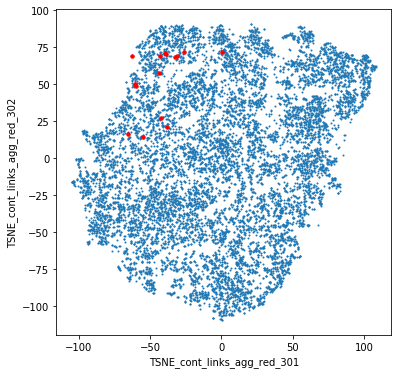

In [12]:
fig,ax=plt.subplots(figsize=(6,6))

data.plot.scatter(x=dimRedType+'1',y=dimRedType+'2',s=1,ax=ax)

temp=data.loc[(data.Tower=='BE-Bra.DD.1996.2014.nc') & (data.Season=='Oct')]
indices=temp.index

temp.plot.scatter(x=dimRedType+'1',y=dimRedType+'2',s=12,c='r',ax=ax)

temp[temp.MedianTSNE50Space_TowerSeason==True].plot.scatter(x=dimRedType+'1',y=dimRedType+'2',s=100,marker='x',c='black',ax=ax)
temp[temp.CentroidTSNE50Space_TowerSeason==True].plot.scatter(x=dimRedType+'1',y=dimRedType+'2',s=100,marker='+',c='black',ax=ax)

In [18]:
tower='FI-Kaa.DD.2000.2006.nc'
season='Jan'

In [32]:
temp=data.loc[(data.Tower==tower) & (data.Season==season)]
        

<IPython.core.display.Javascript object>


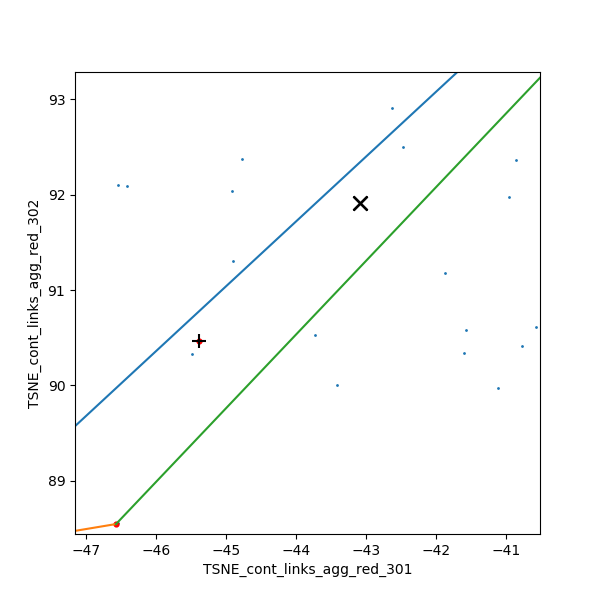

4


In [19]:
fig,ax=plt.subplots(figsize=(6,6))

data.plot.scatter(x=dimRedType+'1',y=dimRedType+'2',s=1,ax=ax)

temp.plot.scatter(x=dimRedType+'1',y=dimRedType+'2',s=12,c='r',ax=ax)

while len(temp)>3:
    print(len(temp))
   # print(len(temp))

    hull=ConvexHull(temp[[dimRedType+'1',dimRedType+'2']])
    points=temp[[dimRedType+'1',dimRedType+'2']].values
    for c,simplex in enumerate(hull.simplices):
        ax.plot(points[simplex, 0], points[simplex, 1])

    print(hull)
    indices=temp.index
    temp=temp[[dimRedType+'1',dimRedType+'2']].drop(indices[hull.vertices])

In [34]:
temp[temp.MedianTSNE50Space_TowerSeason==True].plot.scatter(x=dimRedType+'1',y=dimRedType+'2',s=100,marker='x',c='black',ax=ax)
temp[temp.CentroidTSNE50Space_TowerSeason==True].plot.scatter(x=dimRedType+'1',y=dimRedType+'2',s=100,marker='+',c='black',ax=ax)

In [22]:
        temp_mean=data.loc[indices].mean()

        temp_mean['Tower']=tower
        temp_mean['Season']=season
        temp_mean["MedianTSNE50Space_TowerSeason"]=True
        temp_mean['Clustering_TSNE_cont_links_agg_red_50']=-1
        data=data.append(temp_mean, ignore_index=True)